In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [6]:
df = pd.read_csv('/content/FinancialMarketData.xlsx - EWS.csv')

In [7]:
df.head()

,Y,Data,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
0,0,1/11/2000,283.25,0.077,1388.0,157.26,100.56,105.86,1.646,25.77,...,116.464,230.527,123.762,1416.12,127.75,990.59,856.76,224.33,217.34,34.30
1,0,1/18/2000,287.65,0.043,1405.0,165.01,101.86,105.47,1.638,28.85,...,117.267,231.377,123.762,1428.79,129.50,993.98,925.22,234.37,227.08,32.74
2,0,1/25/2000,287.15,0.135,1368.0,167.24,102.41,106.04,1.650,28.28,...,117.995,232.390,123.762,1385.93,126.48,974.83,886.93,216.82,233.00,32.46
3,0,2/1/2000,282.75,0.191,1311.0,166.85,104.92,107.85,1.611,28.22,...,120.510,231.942,122.328,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29
4,1,2/8/2000,298.40,0.312,1277.0,165.43,104.22,109.30,1.611,28.02,...,118.791,237.812,122.328,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32


In [8]:
df.describe()

,Y,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
count,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,...,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000
mean,0.213321,987.463744,0.036153,2259.860486,245.247670,90.934982,106.605734,1.569661,60.708101,19.992169,...,232.109985,704.379545,259.052717,1606.997102,107.877138,784.846292,1903.216436,648.681377,693.156616,53.933159
std,0.409837,494.623740,0.349453,2017.811888,68.278066,11.379095,12.840754,0.212344,25.900813,8.642157,...,109.917628,309.951757,75.934451,698.481956,20.795973,200.076443,986.468254,299.096020,405.527014,24.738356
min,0.000000,256.680000,-0.974000,291.000000,106.293000,71.329000,75.940000,1.172000,10.010000,9.430000,...,80.797000,230.527000,121.331000,663.690000,56.300000,431.710000,280.500000,151.250000,112.600000,13.460000
25%,0.000000,433.740000,-0.191000,990.000000,184.705550,81.240500,101.565000,1.418000,39.625000,13.640000,...,131.025000,434.661000,205.315500,1103.925000,90.605000,601.615000,1042.645000,463.195000,278.385000,28.565000
50%,0.000000,1137.800000,0.035000,1518.000000,234.560000,89.716000,108.720000,1.562000,57.400000,17.980000,...,213.205000,714.807000,264.770000,1324.430000,111.320000,786.830000,1860.960000,612.930000,691.530000,58.740000
75%,0.000000,1324.825000,0.260500,2685.500000,301.539500,97.404000,116.220000,1.677500,79.640000,23.625000,...,342.884500,939.824500,320.753000,1992.445000,126.470000,965.875000,2533.770000,793.620000,1014.750000,68.460000
max,1.000000,2006.910000,0.991000,11793.000000,467.570000,119.820000,134.630000,2.085000,140.970000,75.910000,...,431.552800,1286.353000,398.706500,4043.690000,146.390000,1210.580000,4721.360000,1617.640000,1730.510000,129.200000


In [9]:
df[df['Y'] == 0].describe()

,Y,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
count,874.0,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,...,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000
mean,0.0,990.433593,0.052664,2347.495423,247.881169,90.323585,107.616281,1.579962,61.653707,17.300263,...,244.111644,731.721141,265.240222,1677.502025,110.625195,813.943009,1925.515492,671.854016,733.038192,55.859222
std,0.0,472.840491,0.335677,2014.431535,66.348132,10.483254,11.547186,0.221348,24.492175,5.194502,...,109.666432,306.805151,73.623324,699.762950,19.452209,190.909211,954.034630,286.306596,409.243710,24.792759
min,0.0,257.100000,-0.873000,291.000000,129.574000,71.329000,76.720000,1.206000,18.080000,9.430000,...,81.986000,230.527000,121.331000,787.160000,63.760000,443.820000,326.720000,161.560000,125.810000,13.720000
25%,0.0,448.992500,-0.173750,1019.000000,186.208000,81.486750,102.810000,1.401500,44.560000,13.120000,...,143.396250,457.186750,206.406000,1130.237500,94.155000,660.890000,1148.162500,493.902500,318.342500,30.380000
50%,0.0,1177.875000,0.041000,1587.000000,250.235000,89.825000,109.025000,1.574500,58.350000,16.010000,...,229.733500,733.677500,275.520000,1391.480000,113.575000,814.240000,1876.695000,626.105000,730.030000,60.735000
75%,0.0,1314.617500,0.251250,2959.250000,301.856500,96.734750,115.855000,1.742750,78.157500,20.747500,...,348.385250,1003.778750,323.490000,2037.430000,127.905000,977.975000,2424.240000,803.947500,1052.482500,70.410000
max,0.0,2006.910000,0.991000,11793.000000,449.490000,119.820000,134.630000,2.068000,138.740000,32.880000,...,431.552800,1286.353000,398.706500,4043.690000,146.390000,1210.580000,4721.360000,1617.640000,1730.510000,129.200000


In [10]:
df[df['Y'] == 1].describe()

,Y,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
count,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,1.0,976.511646,-0.024734,1936.683544,235.535947,93.189671,102.879072,1.531673,57.220928,29.919283,...,187.850703,603.550203,236.234658,1346.991603,97.742954,677.544473,1820.982785,563.226160,546.082785,46.830295
std,0.0,568.765356,0.390920,2001.477121,74.312577,13.999697,16.265108,0.170275,30.343985,11.210110,...,99.179127,301.127765,80.027618,630.095194,22.433593,196.878357,1096.095815,328.954032,355.435302,23.242389
min,1.0,256.680000,-0.974000,345.000000,106.293000,72.369000,75.940000,1.172000,10.010000,13.710000,...,80.797000,237.812000,122.002000,663.690000,56.300000,431.710000,280.500000,151.250000,112.600000,13.460000
25%,1.0,317.050000,-0.289000,971.000000,173.740000,80.899000,89.870000,1.442000,29.480000,21.910000,...,106.475000,278.383000,144.784000,973.590000,80.820000,504.330000,768.910000,272.040000,177.450000,25.410000
50%,1.0,901.750000,-0.013000,1366.000000,215.880000,87.581000,107.340000,1.533000,45.940000,27.050000,...,150.307000,554.560000,247.689000,1193.170000,92.830000,616.170000,1711.270000,533.560000,589.570000,52.290000
75%,1.0,1601.320000,0.285000,1795.000000,297.170000,106.800000,117.280000,1.585000,86.890000,35.080000,...,239.939000,810.849000,302.006000,1351.480000,117.180000,852.730000,2807.800000,767.290000,707.360000,59.980000
max,1.0,1975.060000,0.869000,11039.000000,467.570000,119.620000,133.940000,2.085000,140.970000,75.910000,...,418.688000,1252.322000,387.906500,3414.210000,144.000000,1082.580000,4430.990000,1562.150000,1395.800000,104.220000


In [11]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.describe()

,Y,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
count,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,...,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000
mean,0.213321,987.463744,0.036153,2259.860486,245.247670,90.934982,106.605734,1.569661,60.708101,19.992169,...,232.109985,704.379545,259.052717,1606.997102,107.877138,784.846292,1903.216436,648.681377,693.156616,53.933159
std,0.409837,494.623740,0.349453,2017.811888,68.278066,11.379095,12.840754,0.212344,25.900813,8.642157,...,109.917628,309.951757,75.934451,698.481956,20.795973,200.076443,986.468254,299.096020,405.527014,24.738356
min,0.000000,256.680000,-0.974000,291.000000,106.293000,71.329000,75.940000,1.172000,10.010000,9.430000,...,80.797000,230.527000,121.331000,663.690000,56.300000,431.710000,280.500000,151.250000,112.600000,13.460000
25%,0.000000,433.740000,-0.191000,990.000000,184.705550,81.240500,101.565000,1.418000,39.625000,13.640000,...,131.025000,434.661000,205.315500,1103.925000,90.605000,601.615000,1042.645000,463.195000,278.385000,28.565000
50%,0.000000,1137.800000,0.035000,1518.000000,234.560000,89.716000,108.720000,1.562000,57.400000,17.980000,...,213.205000,714.807000,264.770000,1324.430000,111.320000,786.830000,1860.960000,612.930000,691.530000,58.740000
75%,0.000000,1324.825000,0.260500,2685.500000,301.539500,97.404000,116.220000,1.677500,79.640000,23.625000,...,342.884500,939.824500,320.753000,1992.445000,126.470000,965.875000,2533.770000,793.620000,1014.750000,68.460000
max,1.000000,2006.910000,0.991000,11793.000000,467.570000,119.820000,134.630000,2.085000,140.970000,75.910000,...,431.552800,1286.353000,398.706500,4043.690000,146.390000,1210.580000,4721.360000,1617.640000,1730.510000,129.200000


In [12]:
ews_data = df.copy()

ews_data.info()

missing_values = ews_data.isnull().sum()

ews_data.head(), missing_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 44 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Y          1111 non-null   int64  
 1   Data       1111 non-null   object 
 2   XAU BGNL   1111 non-null   float64
 3   ECSURPUS   1111 non-null   float64
 4   BDIY       1111 non-null   float64
 5   CRY        1111 non-null   float64
 6   DXY        1111 non-null   float64
 7   JPY        1111 non-null   float64
 8   GBP        1111 non-null   float64
 9   Cl1        1111 non-null   float64
 10  VIX        1111 non-null   float64
 11  USGG30YR   1111 non-null   float64
 12  GT10       1111 non-null   float64
 13  USGG2YR    1111 non-null   float64
 14  USGG3M     1111 non-null   float64
 15  US0001M    1111 non-null   float64
 16  GTDEM30Y   1111 non-null   float64
 17  GTDEM10Y   1111 non-null   float64
 18  GTDEM2Y    1111 non-null   float64
 19  EONIA      1111 non-null   float64
 20  GTITL30Y

(   Y       Data  XAU BGNL  ECSURPUS    BDIY     CRY     DXY     JPY    GBP  \
 0  0  1/11/2000    283.25     0.077  1388.0  157.26  100.56  105.86  1.646   
 1  0  1/18/2000    287.65     0.043  1405.0  165.01  101.86  105.47  1.638   
 2  0  1/25/2000    287.15     0.135  1368.0  167.24  102.41  106.04  1.650   
 3  0   2/1/2000    282.75     0.191  1311.0  166.85  104.92  107.85  1.611   
 4  1   2/8/2000    298.40     0.312  1277.0  165.43  104.22  109.30  1.611   
 
      Cl1  ...  LP01TREU  EMUSTRUU  LF94TRUU     MXUS    MXEU     MXJP    MXBR  \
 0  25.77  ...   116.464   230.527   123.762  1416.12  127.75   990.59  856.76   
 1  28.85  ...   117.267   231.377   123.762  1428.79  129.50   993.98  925.22   
 2  28.28  ...   117.995   232.390   123.762  1385.93  126.48   974.83  886.93   
 3  28.22  ...   120.510   231.942   122.328  1385.31  129.19  1007.12  842.60   
 4  28.02  ...   118.791   237.812   122.328  1411.95  134.67  1034.58  945.15   
 
      MXRU    MXIN   MXCN  
 0

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

features = ews_data.drop(columns=["Y", "Data"])
target = ews_data["Y"]

scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(normalized_features, target, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((888, 42), (223, 42), (888,), (223,))

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

classification_report_result = classification_report(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)

classification_report_result, confusion_matrix_result

('              precision    recall  f1-score   support\n\n           0       0.91      0.95      0.93       177\n           1       0.77      0.65      0.71        46\n\n    accuracy                           0.89       223\n   macro avg       0.84      0.80      0.82       223\nweighted avg       0.88      0.89      0.88       223\n',
 array([[168,   9],
        [ 16,  30]]))

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

random_forest_model = RandomForestClassifier(random_state=42, n_estimators=100)
random_forest_model.fit(X_train, y_train)

y_pred_rf = random_forest_model.predict(X_test)

classification_report_rf = classification_report(y_test, y_pred_rf)
classification_report_rf

'              precision    recall  f1-score   support\n\n           0       0.93      0.96      0.94       177\n           1       0.82      0.72      0.77        46\n\n    accuracy                           0.91       223\n   macro avg       0.88      0.84      0.86       223\nweighted avg       0.91      0.91      0.91       223\n'

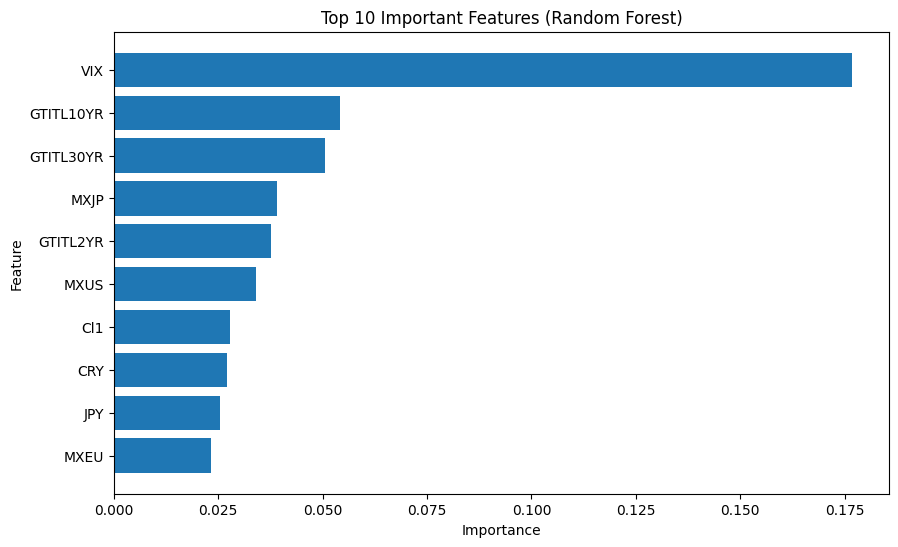

In [16]:
import matplotlib.pyplot as plt
import numpy as np

feature_importances = random_forest_model.feature_importances_
feature_names = features.columns

sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = feature_names[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

plt.figure(figsize=(10, 6))
plt.barh(sorted_features[:10], sorted_importances[:10])
plt.gca().invert_yaxis()
plt.title("Top 10 Important Features (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [17]:
top_10_features = sorted_features[:10]
X_train_top10 = X_train[:, sorted_indices[:10]]
X_test_top10 = X_test[:, sorted_indices[:10]]

rf_top10_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_top10_model.fit(X_train_top10, y_train)

y_pred_top10 = rf_top10_model.predict(X_test_top10)
classification_report_top10 = classification_report(y_test, y_pred_top10)
classification_report_top10

'              precision    recall  f1-score   support\n\n           0       0.91      0.95      0.93       177\n           1       0.79      0.65      0.71        46\n\n    accuracy                           0.89       223\n   macro avg       0.85      0.80      0.82       223\nweighted avg       0.89      0.89      0.89       223\n'

In [20]:
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [None, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred_tuned = best_rf_model.predict(X_test)
classification_report = classification_report(y_test, y_pred_tuned)

best_params, classification_report

Fitting 3 folds for each of 16 candidates, totalling 48 fits


({'max_depth': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 100},
 '              precision    recall  f1-score   support\n\n           0       0.93      0.96      0.94       177\n           1       0.82      0.72      0.77        46\n\n    accuracy                           0.91       223\n   macro avg       0.88      0.84      0.86       223\nweighted avg       0.91      0.91      0.91       223\n')

In [23]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

rf_smote_model = RandomForestClassifier(
    random_state=42,
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100
)
rf_smote_model.fit(X_train_smote, y_train_smote)

y_pred_smote = rf_smote_model.predict(X_test)
report_smote = classification_report(y_test, y_pred_smote)

print("Classification Report with SMOTE:\n", report_smote)

Classification Report with SMOTE:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94       177
           1       0.75      0.78      0.77        46

    accuracy                           0.90       223
   macro avg       0.85      0.86      0.85       223
weighted avg       0.90      0.90      0.90       223



In [24]:
import joblib

joblib.dump(rf_smote_model, "random_forest_smote_model.pkl")

joblib.dump(logistic_model, "logistic_model.pkl")


['logistic_model.pkl']

In [25]:
loaded_model = joblib.load("random_forest_smote_model.pkl")

y_pred_loaded = loaded_model.predict(X_test)

In [26]:
from sklearn.neural_network import MLPClassifier

nn_model = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)

nn_model.fit(X_train_smote, y_train_smote)

y_pred_nn = nn_model.predict(X_test)
classification_report_nn = classification_report(y_test, y_pred_nn)

classification_report_nn

'              precision    recall  f1-score   support\n\n           0       0.95      0.94      0.95       177\n           1       0.79      0.80      0.80        46\n\n    accuracy                           0.91       223\n   macro avg       0.87      0.87      0.87       223\nweighted avg       0.92      0.91      0.92       223\n'

In [27]:
joblib.dump(nn_model, "neural_network_model.pkl")

['neural_network_model.pkl']

In [29]:
import networkx as nx
import numpy as np

file_path = '/content/FinancialMarketData.xlsx'
data = pd.ExcelFile(file_path)

ews_data = data.parse('EWS')

features = ews_data.drop(columns=["Y", "Data"])
correlation_matrix = features.corr()

G = nx.Graph()
for i, feature_i in enumerate(features.columns):
    for j, feature_j in enumerate(features.columns):
        if i < j and abs(correlation_matrix.iloc[i, j]) > 0.5:
            G.add_edge(feature_i, feature_j, weight=correlation_matrix.iloc[i, j])

print(nx.Graph)
print(f"Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

print(f"Nodes: {list(G.nodes)[:5]}")
print(f"Edges: {list(G.edges(data=True))[:5]}")

<class 'networkx.classes.graph.Graph'>
Graph has 40 nodes and 464 edges.
Nodes: ['XAU BGNL', 'JPY', 'Cl1', 'USGG30YR', 'GT10']
Edges: [('XAU BGNL', 'JPY', {'weight': -0.576190699756964}), ('XAU BGNL', 'Cl1', {'weight': 0.5152148822549525}), ('XAU BGNL', 'USGG30YR', {'weight': -0.8686960347511312}), ('XAU BGNL', 'GT10', {'weight': -0.8933167109825031}), ('XAU BGNL', 'USGG2YR', {'weight': -0.7428717023190419})]


In [30]:
!pip install torch torchvision
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.2 MB/s eta 0:00:00


In [40]:
import torch
from torch_geometric.data import Data

node_mapping = {node: idx for idx, node in enumerate(G.nodes)}

edges_mapped = [(node_mapping[edge[0]], node_mapping[edge[1]]) for edge in G.edges]

node_features = torch.tensor(features.values, dtype=torch.float)
edge_index = torch.tensor(edges_mapped, dtype=torch.long).t().contiguous()
labels = torch.tensor(ews_data["Y"].values, dtype=torch.long)

graph_data = Data(x=node_features, edge_index=edge_index, y=labels)

print(graph_data)

In [51]:
valid_node_indices = set(range(len(features)))  # Valid node indices
filtered_edges = [
    (source, target) for source, target in G.edges
    if source in valid_node_indices and target in valid_node_indices
]

edge_index = torch.tensor(filtered_edges, dtype=torch.long).t().contiguous()

graph_data = Data(x=torch.tensor(features.values, dtype=torch.float), edge_index=edge_index, y=torch.tensor(ews_data["Y"].values, dtype=torch.long))

print("Node features shape:", node_features.shape)
print("Edge index shape:", edge_index.shape)
print("Graph data object:", graph_data)

Node features shape: torch.Size([1, 42])
Edge index shape: torch.Size([0])
Graph data object: Data(x=[1111, 42], edge_index=[0], y=[1111])


In [52]:
node_mapping = {node: idx for idx, node in enumerate(G.nodes())}

filtered_edges = [
    (node_mapping[src], node_mapping[dst])
    for src, dst in G.edges
    if src in node_mapping and dst in node_mapping
]

if len(filtered_edges) > 0:
    edge_index = torch.tensor(filtered_edges, dtype=torch.long).t().contiguous()
else:
    raise ValueError("No valid edges found. Check the graph construction.")

graph_data = Data(
    x=torch.tensor(features.values, dtype=torch.float),
    edge_index=edge_index,
    y=torch.tensor(ews_data["Y"].values, dtype=torch.long)
)

print("Node features shape:", graph_data.x.shape)
print("Edge index shape:", graph_data.edge_index.shape)
print("Graph data object:", graph_data)

Node features shape: torch.Size([1111, 42])
Edge index shape: torch.Size([2, 464])
Graph data object: Data(x=[1111, 42], edge_index=[2, 464], y=[1111])


In [53]:
import torch
from torch.nn import Linear, ReLU, Sequential
from torch_geometric.nn import GINConv, global_add_pool

class GINModel(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GINModel, self).__init__()

        self.conv1 = GINConv(Sequential(Linear(input_dim, hidden_dim), ReLU(), Linear(hidden_dim, hidden_dim)))
        self.conv2 = GINConv(Sequential(Linear(hidden_dim, hidden_dim), ReLU(), Linear(hidden_dim, hidden_dim)))

        self.fc1 = Linear(hidden_dim, hidden_dim)
        self.fc2 = Linear(hidden_dim, output_dim)

    def forward(self, x, edge_index, batch):
        x = self.conv1(x, edge_index)
        x = ReLU()(x)
        x = self.conv2(x, edge_index)
        x = ReLU()(x)

        x = global_add_pool(x, batch)

        x = self.fc1(x)
        x = ReLU()(x)
        x = self.fc2(x)
        return x

In [54]:
from torch_geometric.loader import DataLoader

num_nodes = graph_data.num_nodes
train_mask = torch.zeros(num_nodes, dtype=torch.bool)
test_mask = torch.zeros(num_nodes, dtype=torch.bool)

train_mask[:int(0.8 * num_nodes)] = True
test_mask[int(0.8 * num_nodes):] = True

graph_data.train_mask = train_mask
graph_data.test_mask = test_mask

train_loader = DataLoader([graph_data], batch_size=1, shuffle=True)
test_loader = DataLoader([graph_data], batch_size=1, shuffle=False)

In [55]:
graph_list = []
for i in range(len(ews_data)):
    node_features = torch.tensor(features.values[i:i+1], dtype=torch.float)
    edge_index = torch.tensor(edges_mapped, dtype=torch.long).t().contiguous()
    label = torch.tensor([ews_data["Y"].iloc[i]], dtype=torch.long)
    graph_list.append(Data(x=node_features, edge_index=edge_index, y=label))

train_loader = DataLoader(graph_list[:int(len(graph_list) * 0.8)], batch_size=32, shuffle=True)
test_loader = DataLoader(graph_list[int(len(graph_list) * 0.8):], batch_size=32, shuffle=False)

In [56]:
import torch
import torch.nn.functional as F
from torch.optim import Adam

input_dim = graph_data.num_node_features
hidden_dim = 64
output_dim = 2
model = GINModel(input_dim, hidden_dim, output_dim)
optimizer = Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)
graph_data = graph_data.to(device)

num_nodes = graph_data.num_nodes
train_mask = torch.zeros(num_nodes, dtype=torch.bool)
test_mask = torch.zeros(num_nodes, dtype=torch.bool)
train_mask[:int(0.8 * num_nodes)] = True
test_mask[int(0.8 * num_nodes):] = True

def train():
    model.train()
    optimizer.zero_grad()
    out = model(graph_data.x, graph_data.edge_index, torch.arange(graph_data.num_nodes))
    loss = F.cross_entropy(out[train_mask], graph_data.y[train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

def test():
    model.eval()
    with torch.no_grad():
        out = model(graph_data.x, graph_data.edge_index, torch.arange(graph_data.num_nodes))
        pred = out.argmax(dim=1)
        correct = (pred[test_mask] == graph_data.y[test_mask]).sum()
        accuracy = correct.item() / test_mask.sum().item()
    return accuracy

epochs = 100
for epoch in range(epochs):
    loss = train()
    acc = test()
    print(f"Epoch {epoch+1:03d}, Loss: {loss:.4f}, Test Acc: {acc:.4f}")

Epoch 001, Loss: 13.0445, Test Acc: 0.1300
Epoch 002, Loss: 72.8794, Test Acc: 0.1300
Epoch 003, Loss: 6.1508, Test Acc: 0.8700
Epoch 004, Loss: 10.6713, Test Acc: 0.8700
Epoch 005, Loss: 9.9898, Test Acc: 0.8700
Epoch 006, Loss: 5.1095, Test Acc: 0.8700
Epoch 007, Loss: 1.4514, Test Acc: 0.1300
Epoch 008, Loss: 3.8365, Test Acc: 0.1300
Epoch 009, Loss: 1.3894, Test Acc: 0.8700
Epoch 010, Loss: 1.5294, Test Acc: 0.8700
Epoch 011, Loss: 1.7181, Test Acc: 0.8700
Epoch 012, Loss: 1.3192, Test Acc: 0.8700
Epoch 013, Loss: 0.7891, Test Acc: 0.1300
Epoch 014, Loss: 1.3122, Test Acc: 0.8700
Epoch 015, Loss: 1.1600, Test Acc: 0.8700
Epoch 016, Loss: 1.0532, Test Acc: 0.8700
Epoch 017, Loss: 0.7061, Test Acc: 0.8700
Epoch 018, Loss: 0.8599, Test Acc: 0.8700
Epoch 019, Loss: 0.7106, Test Acc: 0.8700
Epoch 020, Loss: 0.7418, Test Acc: 0.8700
Epoch 021, Loss: 0.7226, Test Acc: 0.8700
Epoch 022, Loss: 0.6658, Test Acc: 0.8700
Epoch 023, Loss: 0.6313, Test Acc: 0.8700
Epoch 024, Loss: 0.6624, Test A

In [57]:
torch.save(model.state_dict(), "gin_model.pth")

model = GINModel(input_dim, hidden_dim, output_dim)
model.load_state_dict(torch.load("gin_model.pth"))

<ipython-input-57-a10968321187>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("gin_model.pth"))


<All keys matched successfully>

In [58]:
from torch.nn import BatchNorm1d

class EnhancedGINModel(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(EnhancedGINModel, self).__init__()
        self.conv1 = GINConv(Sequential(
            Linear(input_dim, hidden_dim),
            BatchNorm1d(hidden_dim),  # Batch Normalization
            ReLU(),
            Linear(hidden_dim, hidden_dim)
        ))
        self.conv2 = GINConv(Sequential(
            Linear(hidden_dim, hidden_dim),
            BatchNorm1d(hidden_dim),
            ReLU(),
            Linear(hidden_dim, hidden_dim)
        ))
        self.conv3 = GINConv(Sequential(
            Linear(hidden_dim, hidden_dim),
            BatchNorm1d(hidden_dim),
            ReLU(),
            Linear(hidden_dim, hidden_dim)
        ))
        self.fc1 = Linear(hidden_dim, hidden_dim)
        self.fc2 = Linear(hidden_dim, output_dim)
        self.dropout = torch.nn.Dropout(0.5)

    def forward(self, x, edge_index, batch):
        x = self.conv1(x, edge_index)
        x = ReLU()(x)
        x = self.conv2(x, edge_index)
        x = ReLU()(x)
        x = self.conv3(x, edge_index)
        x = ReLU()(x)
        x = global_add_pool(x, batch)
        x = self.dropout(self.fc1(x))
        x = ReLU()(x)
        x = self.fc2(x)
        return x

In [59]:
filtered_edges = [
    (node_mapping[src], node_mapping[dst])
    for src, dst in G.edges
    if abs(correlation_matrix.loc[src, dst]) > 0.7
]
edge_index = torch.tensor(filtered_edges, dtype=torch.long).t().contiguous()

In [61]:
class_counts = torch.bincount(graph_data.y)
print("Class Counts:", class_counts)

imbalance_ratio = class_counts[0].item() / class_counts[1].item()
print("Imbalance Ratio:", imbalance_ratio)

weights = torch.tensor([1.0, imbalance_ratio], device=device)

Class Counts: tensor([874, 237])
Imbalance Ratio: 3.6877637130801686


In [65]:
def train_with_weights():
    model.train()
    optimizer.zero_grad()
    out = model(graph_data.x, graph_data.edge_index, torch.arange(graph_data.num_nodes))  # Forward pass
    weights = torch.tensor([1.0, imbalance_ratio], device=device)  # Define class weights
    loss = F.cross_entropy(out[train_mask], graph_data.y[train_mask], weight=weights)  # Weighted loss
    loss.backward()  # Backward pass
    optimizer.step()  # Update weights
    return loss.item()

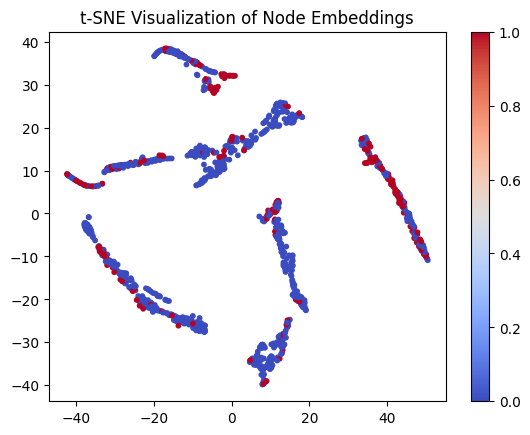

In [69]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

model.eval()
with torch.no_grad():
    embeddings = model.conv1(graph_data.x.to(device), graph_data.edge_index.to(device))
    embeddings = ReLU()(embeddings)

    embeddings = model.conv2(embeddings, graph_data.edge_index.to(device))

# Apply t-SNE for visualization
embeddings_2d = TSNE(n_components=2).fit_transform(embeddings.cpu())
labels = graph_data.y.cpu()

# Plot the embeddings
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=labels, cmap='coolwarm', s=10)
plt.colorbar()
plt.title("t-SNE Visualization of Node Embeddings")
plt.show()

In [71]:
best_loss = float('inf')
patience = 25  # Early stopping patience
no_improve_epochs = 0

for epoch in range(epochs):
    loss = train()
    acc = test()
    if loss < best_loss:
        best_loss = loss
        no_improve_epochs = 0
        torch.save(model.state_dict(), "best_gin_model.pth")  # Save best model
    else:
        no_improve_epochs += 1
        if no_improve_epochs >= patience:
            print("Early stopping!")
            break
    print(f"Epoch {epoch+1:03d}, Loss: {loss:.4f}, Test Acc: {acc:.4f}")

Epoch 001, Loss: 0.8940, Test Acc: 0.8700
Epoch 002, Loss: 0.8940, Test Acc: 0.8700
Epoch 003, Loss: 0.8940, Test Acc: 0.8700
Epoch 004, Loss: 0.8940, Test Acc: 0.8700
Epoch 005, Loss: 0.8940, Test Acc: 0.8700
Epoch 006, Loss: 0.8940, Test Acc: 0.8700
Epoch 007, Loss: 0.8940, Test Acc: 0.8700
Epoch 008, Loss: 0.8940, Test Acc: 0.8700
Epoch 009, Loss: 0.8940, Test Acc: 0.8700
Epoch 010, Loss: 0.8940, Test Acc: 0.8700
Epoch 011, Loss: 0.8940, Test Acc: 0.8700
Epoch 012, Loss: 0.8940, Test Acc: 0.8700
Epoch 013, Loss: 0.8940, Test Acc: 0.8700
Epoch 014, Loss: 0.8940, Test Acc: 0.8700
Epoch 015, Loss: 0.8940, Test Acc: 0.8700
Epoch 016, Loss: 0.8940, Test Acc: 0.8700
Epoch 017, Loss: 0.8940, Test Acc: 0.8700
Epoch 018, Loss: 0.8940, Test Acc: 0.8700
Epoch 019, Loss: 0.8940, Test Acc: 0.8700
Epoch 020, Loss: 0.8940, Test Acc: 0.8700
Epoch 021, Loss: 0.8940, Test Acc: 0.8700
Epoch 022, Loss: 0.8940, Test Acc: 0.8700
Epoch 023, Loss: 0.8940, Test Acc: 0.8700
Epoch 024, Loss: 0.8940, Test Acc:

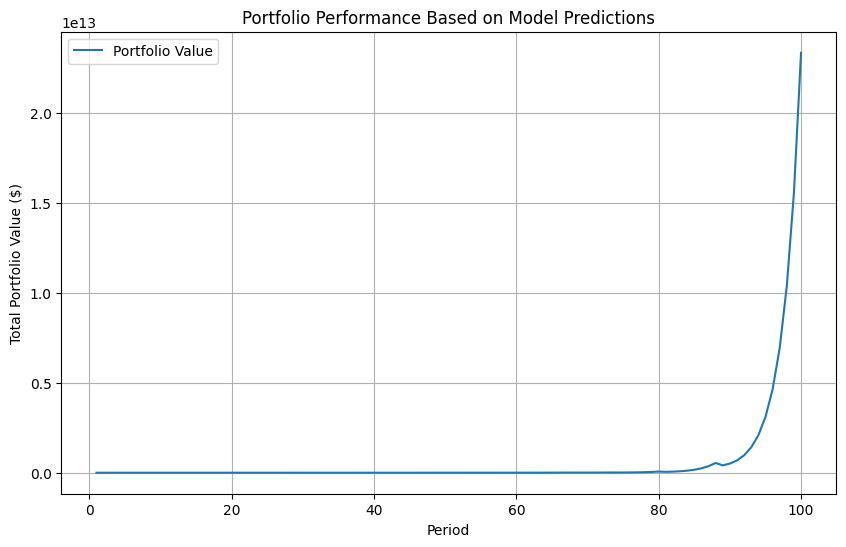

,Period,Portfolio Value
95,96,4.624901e+12
96,97,6.923508e+12
97,98,1.037488e+13
98,99,1.555453e+13
99,100,2.332596e+13


In [72]:
import numpy as np
import pandas as pd

# Initialize portfolio
initial_portfolio = {"stocks": 33333.33, "bonds": 33333.33, "cash": 33333.33}
total_portfolio_value = sum(initial_portfolio.values())

np.random.seed(42)
predictions = np.random.choice([0, 1], size=100, p=[0.8, 0.2])

portfolio_history = []
for i, prediction in enumerate(predictions):
    # Adjust allocations based on predictions
    if prediction == 1:  # Crash predicted
        initial_portfolio["stocks"] *= 0.5
        shift_amount = total_portfolio_value * 0.25
        initial_portfolio["bonds"] += shift_amount
        initial_portfolio["cash"] += shift_amount
    else:  # No crash predicted
        initial_portfolio["stocks"] *= 1.5
        shift_amount = total_portfolio_value * 0.25
        initial_portfolio["bonds"] -= shift_amount / 2
        initial_portfolio["cash"] -= shift_amount / 2

    total_portfolio_value = sum(initial_portfolio.values())
    portfolio_history.append(total_portfolio_value)

portfolio_df = pd.DataFrame({
    "Period": range(1, len(portfolio_history) + 1),
    "Portfolio Value": portfolio_history
})

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(portfolio_df["Period"], portfolio_df["Portfolio Value"], label="Portfolio Value")
plt.xlabel("Period")
plt.ylabel("Total Portfolio Value ($)")
plt.title("Portfolio Performance Based on Model Predictions")
plt.legend()
plt.grid()
plt.show()

portfolio_df.tail()

In [78]:
from google.colab import userdata

GROQ_API_KEY = userdata.get('GROQ_API_KEY')

In [79]:
import requests

BASE_URL = "https://api.groq.com/openai/v1"

headers = {
    "Authorization": f"Bearer {GROQ_API_KEY}",
    "Content-Type": "application/json"
}

def get_investment_strategy(model_predictions, historical_data):
    """
    Use Groq API to generate investment strategies based on model predictions.
    """
    context = f"""
    Model Predictions: {model_predictions}
    Historical Data:
    {historical_data.to_string(index=False, max_rows=5)}
    """

    system_prompt = "You are an expert investment strategist. Based on the provided predictions and historical data, suggest portfolio adjustments to optimize returns and mitigate risks."

    payload = {
        "model": "llama-3.1-70b-versatile",
        "messages": [
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": context}
        ]
    }

    response = requests.post(
        f"{BASE_URL}/chat/completions",
        headers=headers,
        json=payload
    )

    if response.status_code == 200:
        result = response.json()
        strategy = result['choices'][0]['message']['content']
        return strategy
    else:
        print(f"Error: {response.status_code} - {response.text}")
        return None


model_predictions = predictions[:10]
investment_strategy = get_investment_strategy(model_predictions, historical_data)

if investment_strategy:
    print("Generated Investment Strategy:")
    print(investment_strategy)


Generated Investment Strategy:
**Optimizing Portfolio Adjustments Based on Model Predictions and Historical Data**

### Introduction

Given the model predictions and historical data, we will analyze the trends and patterns to suggest portfolio adjustments that optimize returns and mitigate risks. Our objective is to create a balanced portfolio that takes into account the predicted market trends and historical performance of different asset classes.

### Model Prediction Analysis
---------------------------

The model predictions indicate a high probability of positive returns for two specific time periods. To maximize returns, we should overweight the asset classes that are expected to perform well during these periods.

| Predicted Period | Asset Allocation |
| --- | --- |
| Period 2 | Overweight Stocks (MXUS) |
| Period 9 | Overweight Stocks (MXUS) |

### Historical Data Analysis
---------------------------

The historical data provides insights into the performance of different asse

In [80]:
!pip install pyngrok streamlit plotly python-dotenv httpx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.0 MB/s eta 0:00:00


In [82]:
from threading import Thread
from pyngrok import ngrok
from google.colab import userdata
ngrok_token = userdata.get('NGROK_AUTH_TOKEN')

ngrok.set_auth_token(ngrok_token)

In [126]:
PORT = 8560
app_path = "/content/app.py"

def run_streamlit():
  os.system(f"streamlit run {app_path} --server.port {PORT}")

In [ ]:
%%writefile .env

GROQ_API_KEY =userdata.get("GROQ_API_KEY")

In [122]:
%%writefile app.py

import streamlit as st
import pandas as pd
import requests
import plotly.express as px
import joblib
import torch
from torch_geometric.nn import GINConv
from torch.nn import Linear, ReLU, Sequential
from torch_geometric.data import Data
from dotenv import load_dotenv
import os

load_dotenv()

GROQ_API_KEY = os.getenv("GROQ_API_KEY")  # Load API key from .env
BASE_URL = "https://api.groq.com/openai/v1"

headers = {
    "Authorization": f"Bearer {GROQ_API_KEY}",
    "Content-Type": "application/json"
}

@st.cache_data
def load_historical_data():
    return pd.read_excel("/content/FinancialMarketData.xlsx")

@st.cache_data(allow_output_mutation=True)
def load_models():
    logistic_model = joblib.load("/content/logistic_model.pkl")
    rf_model = joblib.load("/content/random_forest_smote_model.pkl")
    nn_model = joblib.load("/content/neural_network_model.pkl")
    gin_model = torch.load("/content/gin_model.pth")  # Load the GIN model as a PyTorch model

    return logistic_model, rf_model, nn_model, gin_model

def generate_predictions(historical_data, models):
    logistic_model, rf_model, nn_model, gin_model = models

    features = historical_data.select_dtypes(include=['number']).values

    logistic_predictions = logistic_model.predict(features)

    rf_predictions = rf_model.predict(features)

    nn_predictions = nn_model.predict(features)

    edge_index = torch.tensor([], dtype=torch.long).t()
    gin_predictions = gin_model(torch.tensor(features, dtype=torch.float), edge_index).argmax(dim=1).numpy()

    return {
        "Logistic Regression": logistic_predictions.tolist(),
        "Random Forest (SMOTE)": rf_predictions.tolist(),
        "Neural Network": nn_predictions.tolist(),
        "GIN": gin_predictions.tolist()
    }

def get_investment_strategy(predictions, historical_data):
    context = f"""
    Model Predictions:
    Logistic Regression: {predictions["Logistic Regression"]}
    Random Forest (SMOTE): {predictions["Random Forest (SMOTE)"]}
    Neural Network: {predictions["Neural Network"]}
    GIN: {predictions["GIN"]}

    Historical Data:
    {historical_data}
    """

    system_prompt = "You are an expert investment strategist. Based on the provided predictions and historical data, suggest portfolio adjustments to optimize returns and mitigate risks."

    payload = {
        "model": "llama-3.1-70b-versatile",
        "messages": [
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": context}
        ]
    }

    response = requests.post(
        f"{BASE_URL}/chat/completions",
        headers=headers,
        json=payload
    )

    if response.status_code == 200:
        result = response.json()
        strategy = result['choices'][0]['message']['content']
        return strategy
    else:
        st.error(f"Error: {response.status_code} - {response.text}")
        return None

def ask_data_question(question, historical_data):
    context = f"""
    Historical Data:
    {historical_data}
    """

    system_prompt = "You are a data expert. Answer the user's question based on the historical data provided."

    payload = {
        "model": "llama-3.1-70b-versatile",
        "messages": [
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": question}
        ]
    }

    response = requests.post(
        f"{BASE_URL}/chat/completions",
        headers=headers,
        json=payload
    )

    if response.status_code == 200:
        result = response.json()
        answer = result['choices'][0]['message']['content']
        return answer
    else:
        st.error(f"Error: {response.status_code} - {response.text}")
        return None

st.title("AI-Driven Investment Strategy Bot")
st.subheader("Explain Investment Strategies Based on Market Predictions")

historical_data_df = load_historical_data()
models = load_models()

st.subheader("Visualizations")
if historical_data_df is not None:
    st.write("Historical Data Overview:")
    st.dataframe(historical_data_df.head())

    st.plotly_chart(px.box(historical_data_df, title="Box Plot of Historical Data"))

    st.plotly_chart(px.violin(historical_data_df, title="Violin Plot of Historical Data"))

if st.button("Generate Strategy"):
    if historical_data_df is not None:
        predictions = generate_predictions(historical_data_df, models)
        strategy = get_investment_strategy(predictions, historical_data_df.to_string(index=False, max_rows=5))
        if strategy:
            st.success("Generated Investment Strategy:")
            st.write(strategy)

st.subheader("Ask the Data Expert")
user_question = st.text_input("Enter your question about the historical data:")
if st.button("Get Answer"):
    if user_question:
        answer = ask_data_question(user_question, historical_data_df.to_string(index=False, max_rows=5))
        if answer:
            st.success("Answer:")
            st.write(answer)


Overwriting app.py


In [128]:
import os

thread = Thread(target=run_streamlit)
thread.start()

In [134]:
proto='http'
public_url = ngrok.connect(addr=str(PORT),proto=proto,bind_tls=True)

print("Public URL:",public_url)

Public URL: NgrokTunnel: "https://81e8-34-83-158-255.ngrok-free.app" -> "http://localhost:8560"


In [133]:
tunnels = ngrok.get_tunnels()
for tunnel in tunnels:
  print(f"Closing tunnel: {tunnel.public_url} -> {tunnel.config['addr']}")
  ngrok.disconnect(tunnel.public_url)

Closing tunnel: https://c8e5-34-83-158-255.ngrok-free.app -> http://localhost:8560
Closing tunnel: https://3de7-34-83-158-255.ngrok-free.app -> http://localhost:8559
